# Chapter 12

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from statsmodels.datasets import get_rdataset
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import StandardScaler
from ISLP import load_data
from sklearn.cluster import (KMeans, AgglomerativeClustering)
from scipy.cluster.hierarchy import (linkage,dendrogram, cut_tree)
from ISLP.cluster import compute_linkage

## Exercise 7

In [2]:
USArrests=get_rdataset('USArrests').data

In [3]:
USArrests.head()

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [4]:
USArrests.shape

(50, 4)

In [5]:
scaler=StandardScaler(with_std=True,with_mean=True)
USArrestscaled=scaler.fit_transform(USArrests)

In [6]:
#Compute the squared Euclidian distance matrix
Eucl_matrix=pairwise_distances(USArrestscaled.transpose())
Eucl_matrix_sq=np.square(Eucl_matrix)

In [7]:
Eucl_matrix_sq.shape

(4, 4)

In [8]:
#Return the correlation matrix
corr_matrix=np.corrcoef(USArrestscaled, rowvar=False)
Comp_corr_matrix=1-corr_matrix

In [9]:
prop_matrix  = (Comp_corr_matrix)/Eucl_matrix_sq

C:\Users\kabousselham\AppData\Local\Temp\ipykernel_15476\2748945556.py:1: RuntimeWarning: divide by zero encountered in divide
  prop_matrix  = (Comp_corr_matrix)/Eucl_matrix_sq
C:\Users\kabousselham\AppData\Local\Temp\ipykernel_15476\2748945556.py:1: RuntimeWarning: invalid value encountered in divide
  prop_matrix  = (Comp_corr_matrix)/Eucl_matrix_sq


In [10]:
prop_matrix

array([[ inf, 0.01, 0.01, 0.01],
       [0.01,  nan, 0.01, 0.01],
       [0.01, 0.01,  inf, 0.01],
       [0.01, 0.01, 0.01,  nan]])

The cited assertion in the exercise instruction is proved for the case of USArrests data set. The proportionality coefficient is 0.01.

## Exercise 8

In [11]:
USArrests=get_rdataset('USArrests').data

In [12]:
scaler=StandardScaler(with_std=True,with_mean=True)
USArrestscaled=scaler.fit_transform(USArrests)

### (a)

In [13]:
pcaUS = PCA()
pcaUS.fit(USArrestscaled)

PCA()

In [14]:
pca_exp=pcaUS.explained_variance_ratio_

### (b)

In [15]:
loadings=pcaUS.components_
X=USArrestscaled.transpose()

In [16]:
exp_var=np.zeros(4)
for i in range(4):
    exp_var[i]=np.sum(np.matmul(loadings[i,:],X)**2)/np.sum(X**2)

In [17]:
exp_var

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

In [18]:
pca_exp/exp_var

array([1., 1., 1., 1.])

The two matrices obtained in (a) and (b) are the same.

## Exercise 9

In [19]:
USArrests=get_rdataset('USArrests').data
scaler=StandardScaler(with_std=True,with_mean=True)
USArrestscaled=scaler.fit_transform(USArrests)

### (a)

In [20]:
HClust = AgglomerativeClustering
hc_comp = HClust(distance_threshold=0,n_clusters=None,linkage='complete')
hc_comp.fit(USArrests)

AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        n_clusters=None)

### (b)

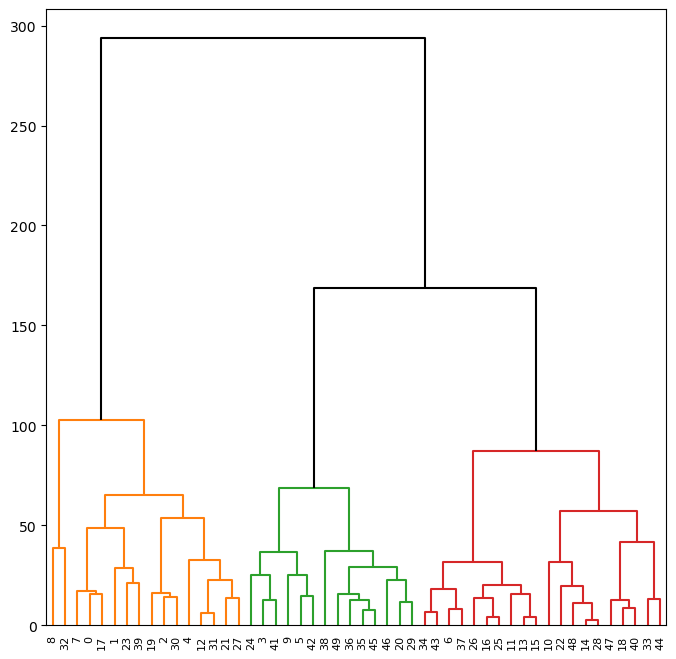

In [21]:
linkage_comp = compute_linkage(hc_comp)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp,ax=ax,color_threshold=120, above_threshold_color='black');

In [22]:
USArrests.index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='rownames')

In [23]:
df1=pd.DataFrame(cut_tree(linkage_comp, n_clusters=3),index=USArrests.index)
df1.index.name='State'
df1.rename(columns={0:'Cluster'},inplace=True)

In [24]:
df1

,Cluster
State,
Alabama,0
Alaska,0
Arizona,0
Arkansas,1
California,0
Colorado,1
Connecticut,2
Delaware,0
Florida,0


### (c)

In [25]:
HClust = AgglomerativeClustering
hc_comp = HClust(distance_threshold=0,n_clusters=None,linkage='complete')
hc_comp.fit(USArrestscaled)

AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        n_clusters=None)

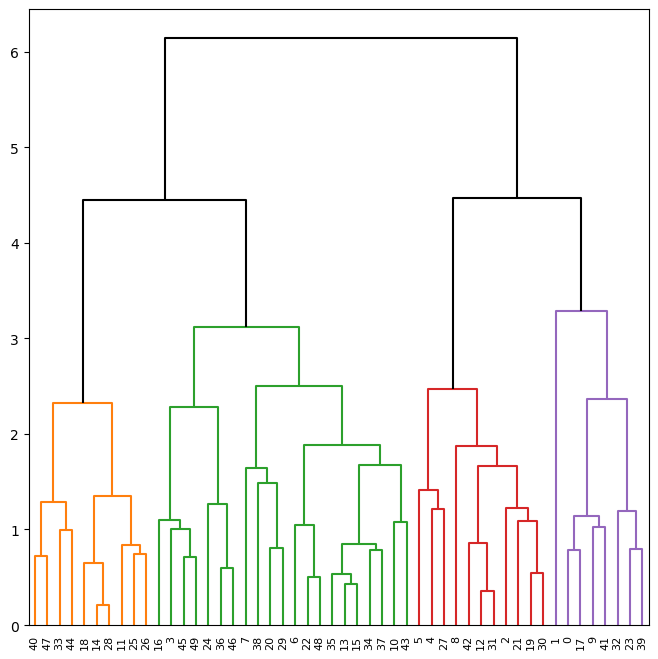

In [26]:
linkage_comp = compute_linkage(hc_comp)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp,ax=ax,color_threshold=4, above_threshold_color='black');

In [27]:
df2=pd.DataFrame(cut_tree(linkage_comp, n_clusters=3),index=USArrests.index)
df2.index.name='State'
df2.rename(columns={0:'Cluster'},inplace=True)

In [28]:
df2

,Cluster
State,
Alabama,0
Alaska,0
Arizona,1
Arkansas,2
California,1
Colorado,1
Connecticut,2
Delaware,2
Florida,1


### (d)

In [29]:
df= df1.join(df2, lsuffix='_Unscaled', rsuffix='_Scaled')

In [30]:
df

,Cluster_Unscaled,Cluster_Scaled
State,,
Alabama,0,0
Alaska,0,0
Arizona,0,1
Arkansas,1,2
California,0,1
Colorado,1,1
Connecticut,2,2
Delaware,0,2
Florida,0,1


In [34]:
df['Cluster_Unscaled'][df['Cluster_Unscaled']==0].count()

16

In [35]:
df['Cluster_Scaled'][df['Cluster_Scaled']==0].count()

8

In [36]:
df['Cluster_Unscaled'][df['Cluster_Unscaled']==1].count()

14

In [37]:
df['Cluster_Scaled'][df['Cluster_Scaled']==1].count()

11

Scaling variables tends to increase the observations in the third cluster.<br>
The variables should be scaled before doing hierchical clustering in this case because feature units are different. For example, `Murder` is a rate per 100,000 while `UrbanPop` is a percentage of urban poulation.

## Exercise 10

In [61]:
np.random.seed(1)
X = np.random.rand(60,50)
X[:20,:20] += 1
X[20:40,20:40] -= 1

In [62]:
#Label the classes
y=np.concatenate((np.repeat(0,20),np.repeat(1,20),np.repeat(2,20)))

### (b)

In [63]:
pca=PCA()
pca_X=pca.fit_transform(X)

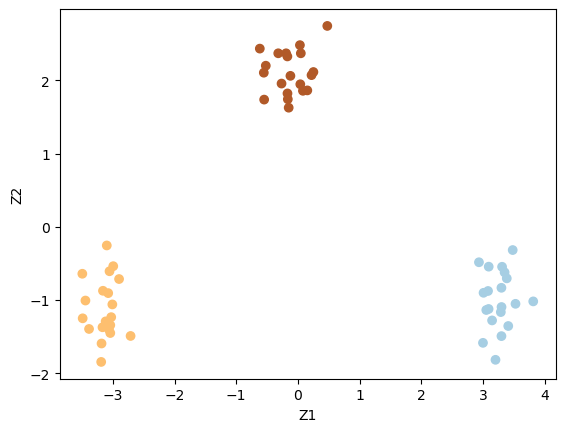

In [64]:
plt.scatter(pca_X[:,0], pca_X[:,1], c=y, cmap=mpl.cm.Paired)
plt.xlabel('Z1')
plt.ylabel('Z2');

### (c)

In [72]:
kmeans_3C = KMeans(n_clusters=3,random_state=2,n_init=20).fit(X)
pd.crosstab(index=kmeans_3C.labels_,columns=y,rownames=['kmeans_3C'],colnames=['y'])

C:\Users\kabousselham\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


y,0,1,2
kmeans_3C,,,
0,0,20,0
1,20,0,0
2,0,0,20


Since K-means clustering arbitrarily numbers the clusters, we conclude that is had correctly identified the 3 real clusters.

### (d)

In [73]:
kmeans_2C = KMeans(n_clusters=2,random_state=3,n_init=20).fit(X)
pd.crosstab(index=kmeans_2C.labels_,columns=y,rownames=['kmeans_2C'],colnames=['y'])

C:\Users\kabousselham\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


y,0,1,2
kmeans_2C,,,
0,20,0,0
1,0,20,20


K-means identifies classes 1 and 2 as pertaining to the same cluster.

### (e)

In [74]:
kmeans_4C = KMeans(n_clusters=4,random_state=4,n_init=20).fit(X)
pd.crosstab(index=kmeans_4C.labels_,columns=y,rownames=['kmeans_4C'],colnames=['y'])

C:\Users\kabousselham\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


y,0,1,2
kmeans_4C,,,
0,0,20,0
1,10,0,0
2,0,0,20
3,10,0,0


K-means splits class 0 in two halves over two clusters.

### (f)

In [76]:
kmeans_3C_pca = KMeans(n_clusters=3,random_state=5,n_init=20).fit(pca_X[:,:2])
pd.crosstab(index=kmeans_3C_pca.labels_,columns=y,rownames=['kmeans_3C_pca'],colnames=['y'])

C:\Users\kabousselham\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


y,0,1,2
kmeans_3C_pca,,,
0,20,0,0
1,0,0,20
2,0,20,0


Again, like with the raw data, K-means correctly identifies clusters.

### (g)

In [77]:
scaled_X=StandardScaler().fit_transform(X)
kmeans_3C_stds = KMeans(n_clusters=3,random_state=6,n_init=20).fit(scaled_X)
pd.crosstab(index=kmeans_3C_stds.labels_,columns=y,rownames=['kmeans_3C_stds'],colnames=['y'])

C:\Users\kabousselham\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


y,0,1,2
kmeans_3C_stds,,,
0,0,0,20
1,20,0,0
2,0,20,0


Once again, K-means correctly identifies the clusters formed in (b).

## Exercise 11

In [102]:
def complete(data,thresh=1e-7,print_result=False,M=1):
    """Function which performs matrix completion where missing values are random
    data: The data matrix to complete.
    thresh: Threshold below which the objective is considered no more decreasing.
    print_result: If True the function must print out the progress in each iteration.
    M: The number of principal components following the SVD decomposition of data."""
    data_hat=data.copy()
    
    #Store the rows and columns indexes of missing values
    r_idx=np.argwhere(np.isnan(data_hat))
    if r_idx.size==0:
        print('Sorry, the inserted matrix is already complete')
        return
    c_index=np.where(np.any(data_hat==np.isnan,axis=0))
    #Step 1 of algorithm 12.1
    data_bar=np.nanmean(data_hat,axis=0)
    data_hat[np.split(r_idx,2,axis=1)[0],np.split(r_idx,2,axis=1)[1]]=data_bar[
        np.split(r_idx,2,axis=1)[1]]
    #Prepare data for step 2
    rel_err = 1
    count = 0
    ismiss = np.isnan(data)
    mssold = np.mean(data_hat[~ismiss]**2)
    mss0 = np.mean(data[~ismiss]**2)
    #Proceed to step 2
    while rel_err > thresh:
        count += 1
        # Step 2(a)
        U, D, V = np.linalg.svd(data_hat)
        L = U[:,:M] * D[None,:M]
        data_app=L.dot(V[:M])    
        # Step 2(b)
        data_hat[ismiss] = data_app[ismiss]
        # Step 2(c)
        mss = np.mean(((data - data_app)[~ismiss])**2)
        rel_err = (mssold - mss) / mss0
        mssold = mss
        if print_result:
            print("Iteration: {0}, MSS:{1:.3f}, Rel.Err {2:.2e}".format(count, mss, rel_err))
    return data_hat

In [3]:
#Test on Boston data set
Boston=load_data('Boston')

In [4]:
Boston['chas'].unique()

array([0, 1], dtype=int64)

In [5]:
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [6]:
Boston['rad'].unique()

array([ 1,  2,  3,  5,  4,  8,  6,  7, 24], dtype=int64)

In [7]:
Boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [27]:
#First we standardize and scale all the data set features except 'chas' cause it is a dummy variable
scaler=StandardScaler(with_std=True,with_mean=True)
Boston_scaled=scaler.fit_transform(Boston.loc[:, Boston.columns != "chas"])

In [28]:
df = pd.DataFrame(Boston_scaled, columns = Boston.columns.drop(['chas']))

In [29]:
#Recover 'chas' feature of Boston data set
df1=df.join(Boston['chas'])

In [60]:
#Leave out increasing numbers of observations from 5% to 30%
df11=df1.to_numpy()
f_omit = 0.05
size=df1.size
label_data=['5%','10%','15%3','20%','25%','30%']
indexes=[(l,M) for l in label_data for M in range(1,9)]
dataframes=[]
for j in range(10):
    #The iteration of the number seed means the repetition of the experience
    np.random.seed(j)
    r_idx = np.random.choice(np.arange(df11.shape[0]),int(f_omit*Boston.shape[0]),replace=False)
    c_idx = np.random.choice(np.arange(df11.shape[1]),int(f_omit*Boston.shape[0]),replace=True)
    df11_f5_na = df11.copy()
    df11_f5_na[r_idx, c_idx] = np.nan
    row=[r_idx]
    column=[c_idx]
    data=[df11_f5_na]
    app_error=[]
    for i in range(1,6):
        r_idx=np.delete(np.arange(df1.shape[0]),row[i-1])
        c_idx=np.delete(np.arange(df1.shape[1]),column[i-1])
        row.append(np.random.choice(r_idx,int(f_omit*Boston.shape[0]),replace=False))
        column.append(np.random.choice(c_idx,int(f_omit*Boston.shape[0]),replace=True))
        X=data[i-1].copy()
        X[row,column]=np.nan
        data.append(X)
    combined=[(d,M) for d in data for M in range(1,9)]
     
    for d,M in combined:
        #Restore binary values for the last column of complete function
        complete_modif=complete(d,M).copy()
        complete_modif[:,12]=np.where(complete_modif[:,12]<0.5,0,1)
        app_error.append((1/size*np.sum((complete_modif-df11)**2))**(1/2))
    dataframes.append(pd.DataFrame(app_error,index=indexes))
    dataframes[-1].index.name='(Missing fraction , M)'
    dataframes[-1].rename(columns={0:'Rep_'+str(j+1)},inplace=True)


In [64]:
#Now let's define the dataframe which sums up the approximation errors
dataframe_errors=dataframes[0].join(dataframes[1:])

In [65]:
dataframe_errors

,Rep_1,Rep_2,Rep_3,Rep_4,Rep_5,Rep_6,Rep_7,Rep_8,Rep_9,Rep_10
"(Missing fraction , M)",,,,,,,,,,
"(5%, 1)",0.054628,0.069940,0.057594,0.081803,0.065842,0.088969,0.066072,0.060569,0.083808,0.065350
"(5%, 2)",0.054628,0.069940,0.057594,0.081803,0.065842,0.088969,0.066072,0.060569,0.083808,0.065350
"(5%, 3)",0.054628,0.069940,0.057594,0.081803,0.065842,0.088969,0.066072,0.060569,0.083808,0.065350
"(5%, 4)",0.054628,0.069940,0.057594,0.081803,0.065842,0.088969,0.066072,0.060569,0.083808,0.065350
"(5%, 5)",0.054628,0.069940,0.057594,0.081803,0.065842,0.088969,0.066072,0.060569,0.083808,0.065350
"(5%, 6)",0.054628,0.069940,0.057594,0.081803,0.065842,0.088969,0.066072,0.060569,0.083808,0.065350
"(5%, 7)",0.054628,0.069940,0.057594,0.081803,0.065842,0.088969,0.066072,0.060569,0.083808,0.065350
"(5%, 8)",0.054628,0.069940,0.057594,0.081803,0.065842,0.088969,0.066072,0.060569,0.083808,0.065350
"(10%, 1)",0.077680,0.079349,0.087846,0.101879,0.084274,0.105155,0.090011,0.082083,0.106743,0.070425


In [66]:
#We'll get the required approximation errors by computing the mean of each line
dataframe_errors.mean(axis=1)

(Missing fraction , M)
(5%, 1)      0.069458
(5%, 2)      0.069458
(5%, 3)      0.069458
(5%, 4)      0.069458
(5%, 5)      0.069458
(5%, 6)      0.069458
(5%, 7)      0.069458
(5%, 8)      0.069458
(10%, 1)     0.088544
(10%, 2)     0.088544
(10%, 3)     0.088544
(10%, 4)     0.088544
(10%, 5)     0.088544
(10%, 6)     0.088544
(10%, 7)     0.088544
(10%, 8)     0.088544
(15%3, 1)    0.107478
(15%3, 2)    0.107478
(15%3, 3)    0.107478
(15%3, 4)    0.107478
(15%3, 5)    0.107478
(15%3, 6)    0.107478
(15%3, 7)    0.107478
(15%3, 8)    0.107478
(20%, 1)     0.122172
(20%, 2)     0.122172
(20%, 3)     0.122172
(20%, 4)     0.122172
(20%, 5)     0.122172
(20%, 6)     0.122172
(20%, 7)     0.122172
(20%, 8)     0.122172
(25%, 1)     0.134907
(25%, 2)     0.134907
(25%, 3)     0.134907
(25%, 4)     0.134907
(25%, 5)     0.134907
(25%, 6)     0.134907
(25%, 7)     0.134907
(25%, 8)     0.134907
(30%, 1)     0.149058
(30%, 2)     0.149058
(30%, 3)     0.149058
(30%, 4)     0.149058
(30%, 5) 

As expected the averaged approximation errors increase with the fraction of missing values. The number of principal components does not affect those errors<br>.
For the case of Boston dataset, the averaged errors range from approximately 7% to 15%.

## Exercise 12

In [100]:
def complete_pca(data,thresh=1e-7,print_result=False,M=1):
    """Function which performs matrix completion using PCA where missing values are random
    data: The data matrix to complete.
    thresh: Threshold below which the objective is considered no more decreasing.
    print_result: If True the function must print out the progress in each iteration.
    M: The number of principal components following the SVD decomposition of data."""
    pca=PCA()
    data_hat=data.copy()
    #Store the rows and columns indexes of missing values
    r_idx=np.argwhere(np.isnan(data_hat))
    if r_idx.size==0:
        print('Sorry, the inserted matrix is already complete')
        return
    c_index=np.where(np.any(data_hat==np.isnan,axis=0))
    #Step 1 of algorithm 12.1
    data_bar=np.nanmean(data_hat,axis=0)
    data_hat[np.split(r_idx,2,axis=1)[0],np.split(r_idx,2,axis=1)[1]]=data_bar[
        np.split(r_idx,2,axis=1)[1]]
    #Prepare data for step 2
    rel_err = 1
    count = 0
    ismiss = np.isnan(data)
    mssold = np.mean(data_hat[~ismiss]**2)
    mss0 = np.mean(data[~ismiss]**2)
    #Proceed to step 2
    while rel_err > thresh:
        count += 1
        # Step 2(a)
        pca.fit(data_hat)
        data_app=pca.transform(data_hat)[:,:M].dot(pca.components_[:M])
        # Step 2(b)
        data_hat[ismiss] = data_app[ismiss]
        # Step 2(c)
        mss = np.mean(((data - data_app)[~ismiss])**2)
        rel_err = (mssold - mss) / mss0
        mssold = mss
        if print_result:
            print("Iteration: {0}, MSS:{1:.3f}, Rel.Err {2:.2e}".format(count, mss, rel_err))
    return data_hat

## Exercise 13

### (a)

In [2]:
df=pd.read_csv('Ch12Ex13.csv', header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.961933,0.441803,-0.975005,1.417504,0.818815,0.316294,-0.024967,-0.063966,0.031497,-0.350311,...,-0.509591,-0.216725,-0.055506,-0.484449,-0.521581,1.949135,1.324335,0.468147,1.061100,1.655970
1,-0.292526,-1.139267,0.195837,-1.281121,-0.251439,2.511997,-0.922206,0.059543,-1.409645,-0.656712,...,1.700708,0.007290,0.099062,0.563853,-0.257275,-0.581781,-0.169887,-0.542304,0.312939,-1.284377
2,0.258788,-0.972845,0.588486,-0.800258,-1.820398,-2.058924,-0.064764,1.592124,-0.173117,-0.121087,...,-0.615472,0.009999,0.945810,-0.318521,-0.117889,0.621366,-0.070764,0.401682,-0.016227,-0.526553
3,-1.152132,-2.213168,-0.861525,0.630925,0.951772,-1.165724,-0.391559,1.063619,-0.350009,-1.489058,...,-0.284277,0.198946,-0.091833,0.349628,-0.298910,1.513696,0.671185,0.010855,-1.043689,1.625275
4,0.195783,0.593306,0.282992,0.247147,1.978668,-0.871018,-0.989715,-1.032253,-1.109654,-0.385142,...,-0.692998,-0.845707,-0.177497,-0.166491,1.483155,-1.687946,-0.141430,0.200778,-0.675942,2.220611


### (b)

In [4]:
#Before doing hierchical clustering we should transpose the dataframe cause for meaningful results
# genes should be attributes of each patient.
df=df.T

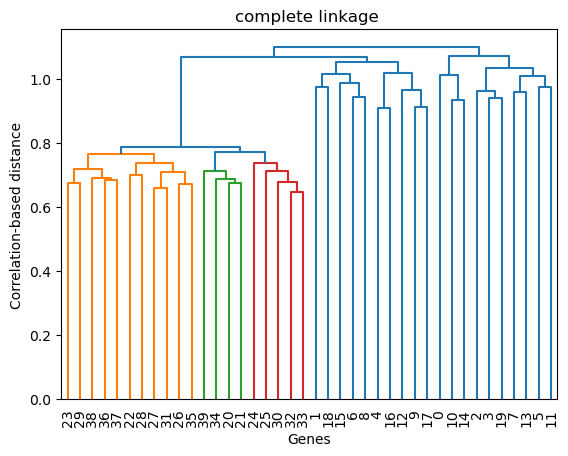

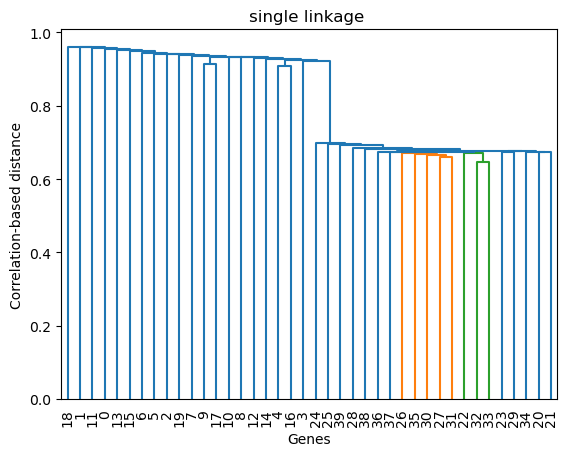

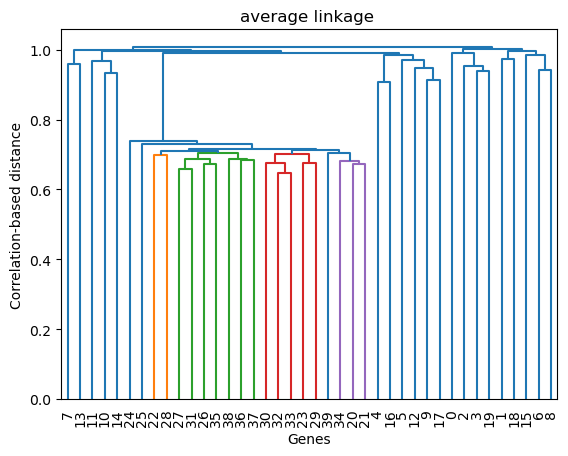

In [5]:
linkages=['complete','single','average']
HC_methods=[]
#Here we'll use linkage function defined in scipy library instead of AgglomerativeClustering
#This is because AgglomerativeClustering does not enable the correlation based distance metric
for i,l in zip(range(4),linkages):
    HC = linkage(y=df, method=l, metric='correlation')
    HC_methods.append(HC)
    plt.figure(i)
    plt.title('%s linkage ' %l)
    plt.xlabel('Genes')
    plt.ylabel('Correlation-based distance')
    dendrogram(HC, labels=df.index, leaf_rotation=90, leaf_font_size=10);


In [6]:
#Results dataframe for complete linkage
complete = pd.DataFrame(cut_tree(HC_methods[0], n_clusters = 2))
complete.index.name = 'patients'
complete.rename(columns={0: 'Complete'}, inplace=True)

In [7]:
#Results dataframe for single linkage
single = pd.DataFrame(cut_tree(HC_methods[1], n_clusters = 2))
single.index.name = 'patients'
single.rename(columns={0: 'Single'}, inplace=True)

In [8]:
#Results dataframe for average linkage
average = pd.DataFrame(cut_tree(HC_methods[2], n_clusters = 2))
average.index.name = 'patients'
average.rename(columns={0: 'Average'}, inplace=True)

In [9]:
dataframes=[complete,single,average]
data=dataframes[0].join(dataframes[1:])

In [10]:
data

,Complete,Single,Average
patients,,,
0,0,0,0
1,1,0,0
2,0,0,0
3,0,0,0
4,1,0,1
5,0,0,1
6,1,0,0
7,0,0,1
8,1,0,0


Yes, results depend on the type of linkage used.

### (c)

In [11]:
# Genes which differ the most across the two groups are the genes which contribute the most in variance
#expalantion. These are the genes which show the high loadings, in absolute values, obtained after PCA
pca=PCA()
pca_df=pca.fit_transform(df)
PVE=pca.explained_variance_ratio_

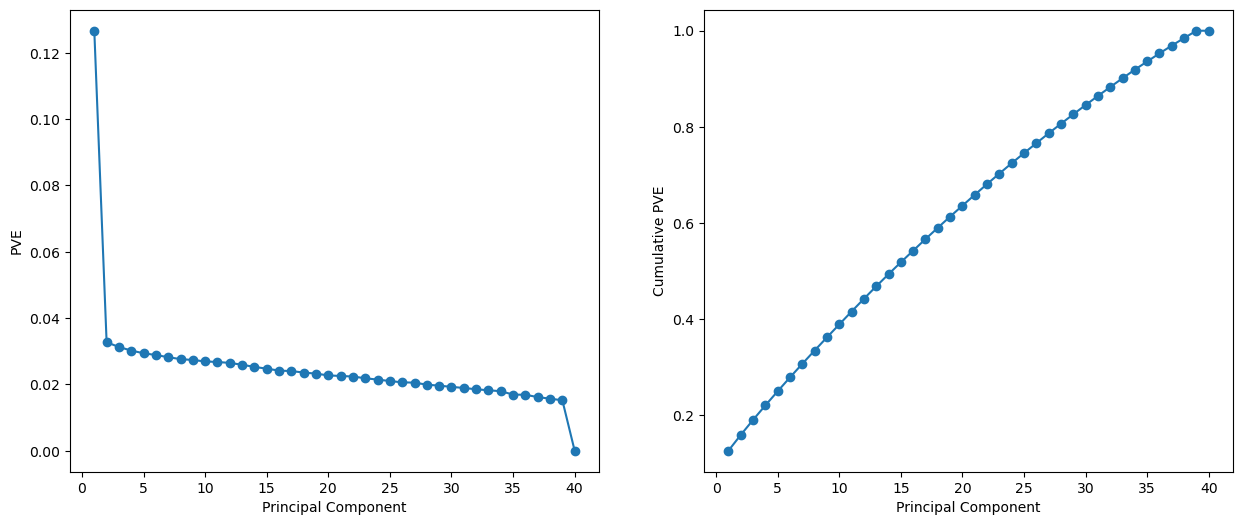

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(15,6))
ax = axes[0]
ticks = np.arange(pca.n_components_)+1
ax.plot(ticks,PVE,marker='o')
ax.set_xlabel('Principal Component');
ax.set_ylabel('PVE')
ax = axes[1]
ax.plot(ticks, PVE.cumsum(),marker='o');
ax.set_xlabel('Principal Component')
ax.set_ylabel('Cumulative PVE');

The first principal components shows an elbos in the right side panel of the previous figure.

In [13]:
#Now let's sort the genes following the first principal component in terms of loadings in abs values
df_pc1= pd.DataFrame({'Gene': range(len(df.T)), 'Loadings': pca.components_[0,:]})
#Add a column for absolute values of loadings
df_pc1['Abs_loadings']=abs(df_pc1['Loadings'])
#Sort the data frame in descending order
df_pc1_sorted=df_pc1.sort_values(by=['Abs_loadings'], ascending=False)

In [17]:
df_pc1_sorted.iloc[:10,:]

,Gene,Loadings,Abs_loadings
599,599,-0.114243,0.114243
583,583,-0.110398,0.110398
548,548,-0.108329,0.108329
539,539,-0.108125,0.108125
501,501,-0.107460,0.107460
581,581,-0.106549,0.106549
564,564,-0.106271,0.106271
567,567,-0.106188,0.106188
528,528,-0.104163,0.104163
598,598,-0.103821,0.103821


The gene which differs the most across the two groups is gene 599.